<a href="https://colab.research.google.com/github/Vigneshthanga/258-Deep-Learning/blob/master/Assignment-2/keras_sparse_categorical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries for module autoreload

In [0]:
#To plot the graph in the output cell and save it with notebook
%matplotlib inline

#To reload all modules before executing a new line
%reload_ext autoreload
%autoreload 2

## Importing libraries.

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)
from matplotlib import pyplot as plt

2.2.0-rc3


## Mounting Google drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Datapath

In [0]:
root_dir = "/content/drive/My Drive/FootballStadiums/data/"

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Creating ImageDataGenerator object using tf keras. Applied Image augmentation on the raw data using parameters - shear_range, zoom_range and horizontal_flip

In [0]:
train_datagen = ImageDataGenerator(shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

## Created Train Generator object using flow_from_Directory as we have segreageted all our data in the repective class folder.

In [0]:
train_generator = train_datagen.flow_from_directory(directory=root_dir+"train/", target_size=(100, 100), color_mode="rgb", batch_size=32, class_mode="sparse", shuffle=True, seed=42)

Found 2345 images belonging to 7 classes.


## Created Valid Generator object using flow_from_Directory as we have segreageted all our data in the repective class folder. We have to be careful in setting false to the shuffle parameter.

In [0]:
valid_generator = train_datagen.flow_from_directory(directory=root_dir+"valid/", target_size=(100,100), color_mode="rgb", batch_size=32, class_mode='sparse', shuffle=False, seed=42)

Found 1030 images belonging to 7 classes.


## Number of batches

In [0]:
print(valid_generator.n//valid_generator.batch_size)

32


## Getting the class labels from the data

In [0]:
classes = list(train_generator.class_indices.keys())
print(classes)

['allianzarena', 'anfield', 'campnou', 'emirates', 'oldtrafford', 'santiagobernabu', 'stamford']


## Getting the iterator object from the train_generator 

In [0]:
iterator = train_generator.__iter__()

In [0]:
x,y = iterator.next()

## We can see clearly that all images are uniformly trimmed to size (100, 100, 3). The channels are kept to 3 not to 1. The images are not converted to GRAYSCALE because, the colr data is important to classify the image. All these football stadiums and their related images are associated mainly to their clib color. Eg: Manchester - Dark Red, Chelsea - Dark Blue

In [0]:
x.shape

(32, 100, 100, 3)

## Now let's visualize the data

oldtrafford


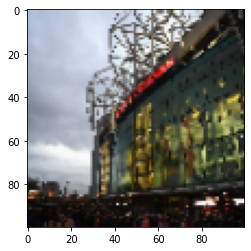

anfield


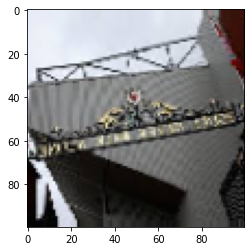

santiagobernabu


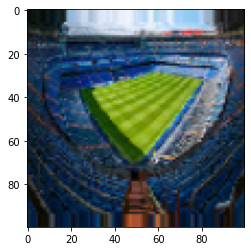

campnou


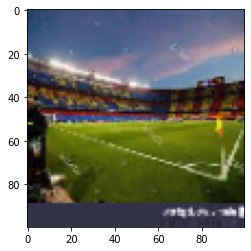

santiagobernabu


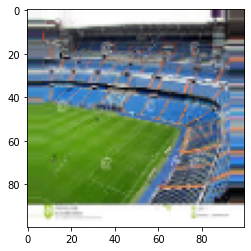

anfield


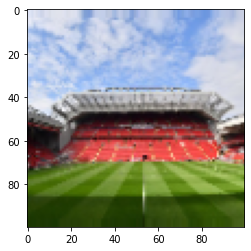

emirates


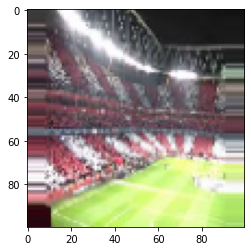

allianzarena


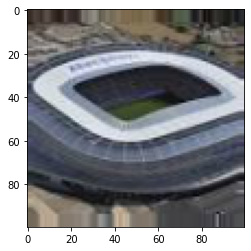

emirates


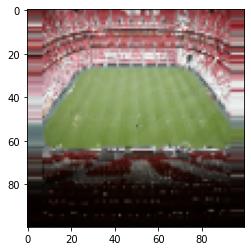

oldtrafford


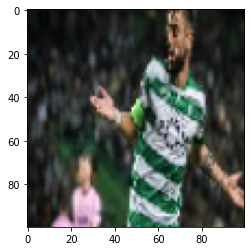

In [0]:
import numpy as np
for i in range(0,10):
    image = x[i]
    #print(image.shape)
    print(classes[int(y[i])])
    plt.imshow(image/255.)
    plt.show()

## Model definition as follows:
Below layers from 1 to 4 are **stacked up twice:** 

1. Sequential layer followed by 2D convoluation layer having kernel size of (3,3) and having a Relu activation layer before feeding to the next layer
2. Added Batch Normalization
3. MaxPooling layer added of size 2
4. 2% dropout layer added
5. Then comes the flatten layer of size 256 with Relu activation
6. Then we have 7 node Softmax activation layer.

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=300, kernel_size=(3,3), kernel_initializer=tf.keras.initializers.he_normal(), padding='same', activation='relu', input_shape=(100,100,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(filters=300, kernel_size=(3,3), kernel_initializer=tf.keras.initializers.he_normal(), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(7, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 300)     8400      
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 100, 300)     1200      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 300)       0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 300)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 300)       810300    
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 300)       1200      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 300)       0

## Model compilation using these hyperparameters:


1.   loss - sparse_categorical_entropy
2.   optimizer - Adam
3.   metrics - accuracy



In [0]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [0]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=50
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
47/73 [==================>...........] - ETA: 4:32 - loss: 33.8258 - accuracy: 0.2294

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


73/73 [==============================] - ETA: 0s - loss: 22.5594 - accuracy: 0.2093 

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


73/73 [==============================] - 997s 14s/step - loss: 22.5594 - accuracy: 0.2093 - val_loss: 2.3512 - val_accuracy: 0.1699
Epoch 2/50
73/73 [==============================] - 831s 11s/step - loss: 1.9663 - accuracy: 0.1879 - val_loss: 2.0111 - val_accuracy: 0.2002
Epoch 3/50
73/73 [==============================] - 834s 11s/step - loss: 1.8936 - accuracy: 0.2123 - val_loss: 2.3370 - val_accuracy: 0.2041
Epoch 4/50
73/73 [==============================] - 825s 11s/step - loss: 1.8626 - accuracy: 0.2222 - val_loss: 2.3875 - val_accuracy: 0.2158
Epoch 5/50
 7/73 [=>............................] - ETA: 8:31 - loss: 1.9224 - accuracy: 0.1891

## Save the trained model using tf's save_model()

In [0]:
tf.keras.models.save_model(
    model, '/content/drive/My Drive/stadium', overwrite=True, include_optimizer=True, save_format='tf',
    signatures=None, options=None
)

In [0]:
score = model.evaluate_generator(generator=valid_generator,steps=STEP_SIZE_VALID)

In [0]:
print(score)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
y_pred = model.predict_generator(valid_generator, steps=(valid_generator.n//valid_generator.batch_size)+1)
y_pred = np.argmax(y_pred, axis=1)
print(y_pred)
print('Confusion Matrix')
#confusion_matrix()
print(confusion_matrix(valid_generator.classes, y_pred))
print('Classification Report')
print(classification_report(valid_generator.classes, y_pred, target_names=classes))